In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('C:/kaggle_data/titanic/train.csv')

- 아래의 내용은 한빛미디어의 <데이터가 뛰어노는 AI 놀이터, 캐글>의 일부를 참고한 내용입니다. 더 자세한 내용은 책에서 확인하실 수 있습니다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
def load():
    temp = train['Embarked']
    return temp
temp = load()

# 원-핫 인코딩
- 범주의 개수(level)만큼의 가변수를 만들어낸다 == 차원이 늘어난다.
- 0값을 가지는 feature가 늘어난다.
- level이 너무 많으면 아래의 방법들을 생각해보자.
    1. 다른 방법으로 인코딩하기
    2. 임의의 규칙으로 그룹화하기(나의 판단으로 그룹을 만들거나 비지도 학습)
    3. 빈도가 낮은 범주를 Others로 묶어주기
    
    
- 판다스의 get_dummies(df[cols])를 이용

In [10]:
temp

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
pd.get_dummies(temp)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


# 라벨 인코딩(label, ordinal encoding)
- 각 level을 단순히 숫자로 대치하는 방법
- *숫자간의 gap이 생겨 악영향을 끼칠 수도 있다*
- train과 test에 다른 카테고리가 있는 상황에 주의


- sklearn.preprocessing의 LabelEncoder를 사용한다
    - fit하고 transform 하거나
    - fit_transform 하거나

In [19]:
from sklearn.preprocessing import LabelEncoder as LE

In [20]:
enc = LE()
enc.fit(temp)
pd.Series(enc.transform(temp))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

In [22]:
pd.Series(enc.fit_transform(temp))

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Length: 891, dtype: int32

# 특징해싱
- 해시 함수에 따른 계산에 의해 다른 레벨에서도 같은 위치에 플래그를 표시할 수도 있다
- 자주 쓰이진 않는다.
- 일종의 차원축소
- 자연어처리를 위해 쓰이던 것 같다.(bag of words의 대안)

In [34]:
from sklearn.feature_extraction import FeatureHasher

# FeatureHasher의 사용법은 다른 encoder와 조금 달라짐
fh = FeatureHasher(n_features=10, input_type='string')

In [37]:
temp = train['Name']
temp.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [42]:
# 변수를 문자열로 변환한 후 FeatureHasher 적용
hash_train = fh.transform(temp.astype(str).values)
hash_train = pd.DataFrame(hash_train)
hash_train

,0
0,"(0, 0)\t3.0\n (0, 1)\t-3.0\n (0, 2)\t4.0\n..."
1,"(0, 0)\t3.0\n (0, 1)\t-3.0\n (0, 2)\t4.0\n..."
2,"(0, 0)\t3.0\n (0, 1)\t-8.0\n (0, 2)\t2.0\n..."
3,"(0, 0)\t4.0\n (0, 1)\t-2.0\n (0, 2)\t12.0\..."
4,"(0, 0)\t2.0\n (0, 1)\t-3.0\n (0, 2)\t8.0\n..."
...,...
886,"(0, 0)\t3.0\n (0, 1)\t-1.0\n (0, 2)\t4.0\n..."
887,"(0, 0)\t6.0\n (0, 1)\t-3.0\n (0, 2)\t2.0\n..."
888,"(0, 0)\t3.0\n (0, 1)\t-5.0\n (0, 2)\t5.0\n..."
889,"(0, 0)\t1.0\n (0, 1)\t-2.0\n (0, 2)\t5.0\n..."


In [43]:
for i in range(len(hash)):
    train.loc[i,'i1'],\
    train[i,'i2'],\
    train[i,'i3'],\
    train[i,'i4'],\
    train[i,'i5'],\
    train[i,'i6'], \
    train[i,'i7'],\
    train[i,'i8'], \
    train[i,'i9'],\
    train[i,'i10']\
    = hash.iloc[i,0].toarray()[0]

In [44]:
train[['Name']].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [46]:
new = train[['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10']]
new.head(10)

,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10
0,3.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
1,3.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
2,3.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
3,4.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
4,2.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
5,4.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
6,3.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
7,5.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
8,4.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0
9,3.0,-4.0,3.0,1.0,1.0,2.0,1.0,-1.0,0.0,0.0


# 프리퀀시 인코딩
- 각 범주의 출현 횟수로 인코딩하는 방법

In [ ]:
for c in cat_cols:
    freq = train_x[c].value_counts()
    
    # 카테고리 출현 횟수로 치환
    train_x[c] = train_x[c].map(freq)
    test_x[c] = test_x[c].map(freq)

# 타깃 인코딩
- 특정 범주를 갖는 행들의 타겟값의 평균을 집계해 인코딩
- 사용하기 까다로우므로 잘 고려할 것
- OOF 방식을 사용할 수도 있다.
- 데이터 누출에 주의
    - 1:1 대응시 :만약 id값으로 인코딩한다면 목적변수값이 그대로 반영
    - 특정 레벨의 행 개수가 적을 경우, 목적변수의 영향력이 커져버려 과적합
    - 다른 특성들을 이용해 예측해야 할 값을 타깃인코딩 값으로 예측하여 feature importance가 꼬인다.
    - OOF로 변환할 경우 leave-one-out 문제: fold수가 많아지면 같은 레이블인데 다른 값을 갖기도 함, 상관관계의 부호가 반대가 될 수도 있음
    
    

In [50]:
## 1대1 대응 관계 예시
train[["PassengerId",'Fare']]

,PassengerId,Fare
0,1,7.2500
1,2,71.2833
2,3,7.9250
3,4,53.1000
4,5,8.0500
...,...,...
886,887,13.0000
887,888,30.0000
888,889,23.4500
889,890,30.0000


# 임베딩
- 사전 학습된 임베딩을 사용할 수도 있다
- word2Vec
- Glove
- fastText
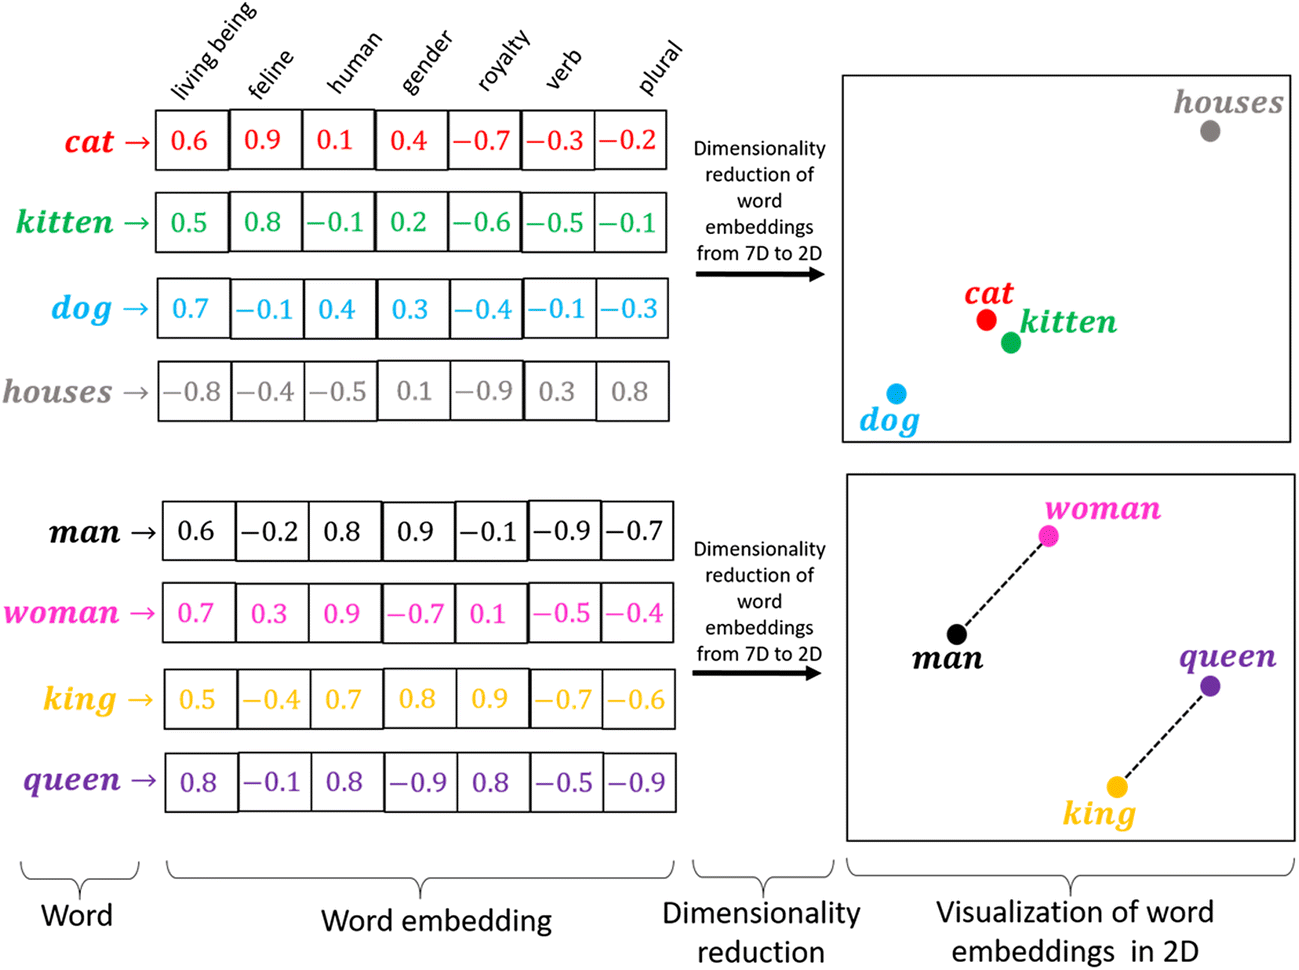
- 이미지 출처: https://medium.com/@hari4om/word-embedding-d816f643140